In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv("/content/Twitter_Data.csv")
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


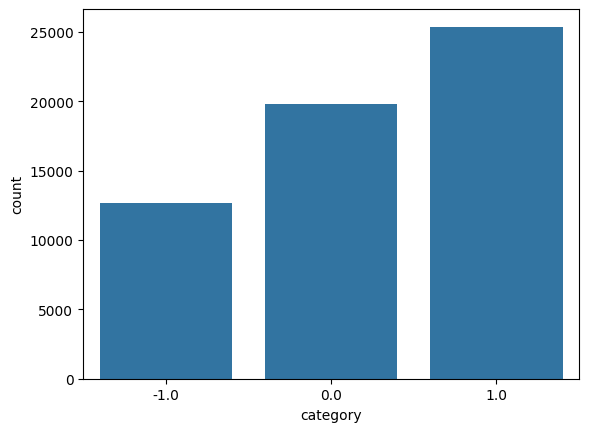

In [ ]:
sns.countplot(x='category', data=data)
plt.show()

In [ ]:
data.dropna(how='any', inplace=True)
data.isnull().sum()

,0
clean_text,0
category,0


In [ ]:
texts = data['clean_text'].tolist()
labels = data['category'].tolist()

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()
    tokens = text.split()

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

In [ ]:
preprocessed_texts = [preprocess_text(text) for text in texts]

In [ ]:
# Tokenization and word embeddings
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(preprocessed_texts)
sequences = tokenizer.texts_to_sequences(preprocessed_texts)

In [ ]:
max_length = 80
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# Prepare labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(set(labels))
one_hot_labels = to_categorical(encoded_labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

In [ ]:
class_names = {"-1":"Negative", "0":"Neutral", "1":"Positive"}

In [ ]:
embedding_dim = 16

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(SimpleRNN(32)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, batch_size=32, verbose=1)


Epoch 1/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 162s 116ms/step - accuracy: 0.6029 - loss: 0.5071 - val_accuracy: 0.8101 - val_loss: 0.3085
Epoch 2/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 148s 114ms/step - accuracy: 0.8449 - loss: 0.2688 - val_accuracy: 0.8330 - val_loss: 0.2796
Epoch 3/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 142s 109ms/step - accuracy: 0.8875 - loss: 0.2069 - val_accuracy: 0.8455 - val_loss: 0.2846
Epoch 4/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 204s 111ms/step - accuracy: 0.9079 - loss: 0.1737 - val_accuracy: 0.8200 - val_loss: 0.3088
Epoch 5/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 195s 106ms/step - accuracy: 0.9211 - loss: 0.1498 - val_accuracy: 0.8135 - val_loss: 0.3449


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")

362/362 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8180 - loss: 0.3392
Test Accuracy: 0.8163512349128723


In [ ]:
def preprocess_text(text):
    # Convert text to sequence of integers
    sequence = tokenizer.texts_to_sequences([text])

    # Pad the sequence to match the input length used during training
    padded_sequence = pad_sequences(sequence, maxlen=max_length)

    return padded_sequence

# Now you can predict
text = "The movie was sooo good. The cast outdid themselves"
processed_text = preprocess_text(text)
prediction = model.predict(processed_text)

# Interpret the prediction (depends on your specific task)
print(class_names[f'{np.argmax(prediction)}'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
Positive
